In [250]:
import warnings
warnings.filterwarnings(action='ignore')
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [126]:
# plot 한글
plt.rcParams['font.family'] = 'D2Coding'

In [127]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoost

In [253]:
# 2015년부터 있는 데이터
df = pd.read_csv('테슬라 총합.csv', index_col=0)

In [255]:
# 3일 shift
df.tesla = df.tesla.shift(-3)
df.dropna(inplace=True)
df.date = pd.to_datetime(df.date)

In [130]:
y = df.tesla
x = df.drop(['date','tesla', 'elec_fee', 'tesla_volatility'], axis=1)

In [131]:
# 75 : 25 비율
x_train, x_test = x.iloc[:1350], x.iloc[1350:]
y_train, y_test = y.iloc[:1350], y.iloc[1350:]

In [132]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [133]:
# model 돌려보기
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
preds_lr = lr.predict(x_test_scaled)
print('lr_train :', lr.score(x_train_scaled,y_train))
print('lr_test :', lr.score(x_test_scaled,y_test))

rid = Ridge()
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print('='*50)
print('rid_train :', rid.score(x_train_scaled,y_train))
print('rid_test :', rid.score(x_test_scaled,y_test))
las = Lasso()
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
print('='*50)
print('las_train :', las.score(x_train_scaled,y_train))
print('las_test :', las.score(x_test_scaled,y_test))
xb = XGBRegressor()
xb.fit(x_train_scaled, y_train)
preds_xb = xb.predict(x_test_scaled)
print('='*50)
print('xgb_train :', xb.score(x_train_scaled,y_train))
print('xgb_test :', xb.score(x_test_scaled,y_test))
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)
preds_lgbm = lgbm.predict(x_test_scaled)
print('='*50)
print('lgbm_train :', lgbm.score(x_train_scaled,y_train))
print('lgbm_test :', lgbm.score(x_test_scaled,y_test))
ela = ElasticNet()
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

lr_train : 0.8733597986176896
lr_test : -2.4928122656119274
rid_train : 0.8726124619715776
rid_test : -2.5943667855515185
las_train : 0.7720369895980269
las_test : -2.6423625153426107
xgb_train : 0.9999563313984102
xgb_test : -4.494306045192062
lgbm_train : 0.9834681259554874
lgbm_test : -4.67367782283847
ela_train : 0.7260072982168077
ela_test : -3.266630558581719


In [134]:
cat = CatBoost()
cat.fit(x_train_scaled, y_train)
preds_cat = cat.predict(x_test_scaled)
print('='*50)
print('cat_test :', r2_score(y_test,preds_cat))

Learning rate set to 0.042931
0:	learn: 23.0211217	total: 3.71ms	remaining: 3.7s
1:	learn: 22.2548162	total: 6.59ms	remaining: 3.29s
2:	learn: 21.5380446	total: 9.52ms	remaining: 3.16s
3:	learn: 20.8212013	total: 12.6ms	remaining: 3.13s
4:	learn: 20.1790646	total: 15.8ms	remaining: 3.15s
5:	learn: 19.5302990	total: 19ms	remaining: 3.14s
6:	learn: 18.9142069	total: 21.9ms	remaining: 3.1s
7:	learn: 18.3490814	total: 24.7ms	remaining: 3.06s
8:	learn: 17.7935627	total: 27.5ms	remaining: 3.03s
9:	learn: 17.2809164	total: 30.4ms	remaining: 3.01s
10:	learn: 16.8073203	total: 33.5ms	remaining: 3.01s
11:	learn: 16.3034846	total: 36.5ms	remaining: 3s
12:	learn: 15.8206770	total: 39.3ms	remaining: 2.98s
13:	learn: 15.4280224	total: 42.1ms	remaining: 2.97s
14:	learn: 15.0442831	total: 45ms	remaining: 2.95s
15:	learn: 14.5983175	total: 48ms	remaining: 2.95s
16:	learn: 14.2073465	total: 50.9ms	remaining: 2.94s
17:	learn: 13.8033637	total: 53.8ms	remaining: 2.93s
18:	learn: 13.4326241	total: 56.8ms	r

178:	learn: 3.9753797	total: 534ms	remaining: 2.45s
179:	learn: 3.9574120	total: 537ms	remaining: 2.45s
180:	learn: 3.9505283	total: 541ms	remaining: 2.45s
181:	learn: 3.9416270	total: 544ms	remaining: 2.44s
182:	learn: 3.9351625	total: 547ms	remaining: 2.44s
183:	learn: 3.9284664	total: 550ms	remaining: 2.44s
184:	learn: 3.9120862	total: 553ms	remaining: 2.44s
185:	learn: 3.8967163	total: 556ms	remaining: 2.43s
186:	learn: 3.8832494	total: 559ms	remaining: 2.43s
187:	learn: 3.8651155	total: 562ms	remaining: 2.43s
188:	learn: 3.8436205	total: 565ms	remaining: 2.42s
189:	learn: 3.8316699	total: 568ms	remaining: 2.42s
190:	learn: 3.8108321	total: 570ms	remaining: 2.42s
191:	learn: 3.8031137	total: 573ms	remaining: 2.41s
192:	learn: 3.7844081	total: 576ms	remaining: 2.41s
193:	learn: 3.7786193	total: 579ms	remaining: 2.41s
194:	learn: 3.7715314	total: 582ms	remaining: 2.4s
195:	learn: 3.7651003	total: 585ms	remaining: 2.4s
196:	learn: 3.7523704	total: 588ms	remaining: 2.4s
197:	learn: 3.7

363:	learn: 2.5034040	total: 1.07s	remaining: 1.88s
364:	learn: 2.5015120	total: 1.08s	remaining: 1.88s
365:	learn: 2.4913427	total: 1.08s	remaining: 1.87s
366:	learn: 2.4863450	total: 1.08s	remaining: 1.87s
367:	learn: 2.4795419	total: 1.09s	remaining: 1.87s
368:	learn: 2.4770106	total: 1.09s	remaining: 1.86s
369:	learn: 2.4700415	total: 1.09s	remaining: 1.86s
370:	learn: 2.4669579	total: 1.1s	remaining: 1.86s
371:	learn: 2.4606369	total: 1.1s	remaining: 1.85s
372:	learn: 2.4539071	total: 1.1s	remaining: 1.85s
373:	learn: 2.4491824	total: 1.1s	remaining: 1.85s
374:	learn: 2.4404947	total: 1.11s	remaining: 1.85s
375:	learn: 2.4354570	total: 1.11s	remaining: 1.84s
376:	learn: 2.4306706	total: 1.11s	remaining: 1.84s
377:	learn: 2.4284447	total: 1.12s	remaining: 1.84s
378:	learn: 2.4259564	total: 1.12s	remaining: 1.83s
379:	learn: 2.4210018	total: 1.12s	remaining: 1.83s
380:	learn: 2.4185181	total: 1.13s	remaining: 1.83s
381:	learn: 2.4141378	total: 1.13s	remaining: 1.82s
382:	learn: 2.41

547:	learn: 1.7646212	total: 1.62s	remaining: 1.33s
548:	learn: 1.7643156	total: 1.62s	remaining: 1.33s
549:	learn: 1.7639970	total: 1.62s	remaining: 1.33s
550:	learn: 1.7611893	total: 1.63s	remaining: 1.32s
551:	learn: 1.7576864	total: 1.63s	remaining: 1.32s
552:	learn: 1.7554933	total: 1.63s	remaining: 1.32s
553:	learn: 1.7528606	total: 1.64s	remaining: 1.32s
554:	learn: 1.7500549	total: 1.64s	remaining: 1.31s
555:	learn: 1.7467366	total: 1.64s	remaining: 1.31s
556:	learn: 1.7429667	total: 1.64s	remaining: 1.31s
557:	learn: 1.7402573	total: 1.65s	remaining: 1.3s
558:	learn: 1.7374241	total: 1.65s	remaining: 1.3s
559:	learn: 1.7342746	total: 1.65s	remaining: 1.3s
560:	learn: 1.7310989	total: 1.66s	remaining: 1.29s
561:	learn: 1.7283820	total: 1.66s	remaining: 1.29s
562:	learn: 1.7271303	total: 1.66s	remaining: 1.29s
563:	learn: 1.7246132	total: 1.66s	remaining: 1.29s
564:	learn: 1.7195912	total: 1.67s	remaining: 1.28s
565:	learn: 1.7175488	total: 1.67s	remaining: 1.28s
566:	learn: 1.7

730:	learn: 1.3409674	total: 2.16s	remaining: 795ms
731:	learn: 1.3389012	total: 2.16s	remaining: 792ms
732:	learn: 1.3379261	total: 2.17s	remaining: 789ms
733:	learn: 1.3373978	total: 2.17s	remaining: 786ms
734:	learn: 1.3353070	total: 2.17s	remaining: 783ms
735:	learn: 1.3340103	total: 2.17s	remaining: 780ms
736:	learn: 1.3317219	total: 2.18s	remaining: 777ms
737:	learn: 1.3292660	total: 2.18s	remaining: 774ms
738:	learn: 1.3270718	total: 2.18s	remaining: 771ms
739:	learn: 1.3259107	total: 2.19s	remaining: 768ms
740:	learn: 1.3229832	total: 2.19s	remaining: 765ms
741:	learn: 1.3189803	total: 2.19s	remaining: 762ms
742:	learn: 1.3168500	total: 2.19s	remaining: 759ms
743:	learn: 1.3146448	total: 2.2s	remaining: 756ms
744:	learn: 1.3130784	total: 2.2s	remaining: 753ms
745:	learn: 1.3100891	total: 2.2s	remaining: 750ms
746:	learn: 1.3099698	total: 2.21s	remaining: 747ms
747:	learn: 1.3073635	total: 2.21s	remaining: 744ms
748:	learn: 1.3069688	total: 2.21s	remaining: 741ms
749:	learn: 1.3

906:	learn: 1.0247281	total: 2.7s	remaining: 277ms
907:	learn: 1.0229021	total: 2.71s	remaining: 274ms
908:	learn: 1.0218039	total: 2.71s	remaining: 271ms
909:	learn: 1.0212904	total: 2.71s	remaining: 268ms
910:	learn: 1.0197982	total: 2.72s	remaining: 266ms
911:	learn: 1.0170663	total: 2.72s	remaining: 263ms
912:	learn: 1.0150994	total: 2.72s	remaining: 260ms
913:	learn: 1.0138497	total: 2.73s	remaining: 257ms
914:	learn: 1.0122501	total: 2.73s	remaining: 254ms
915:	learn: 1.0110358	total: 2.73s	remaining: 251ms
916:	learn: 1.0086080	total: 2.74s	remaining: 248ms
917:	learn: 1.0065573	total: 2.74s	remaining: 245ms
918:	learn: 1.0060593	total: 2.75s	remaining: 242ms
919:	learn: 1.0038310	total: 2.75s	remaining: 239ms
920:	learn: 1.0019214	total: 2.75s	remaining: 236ms
921:	learn: 0.9995351	total: 2.76s	remaining: 233ms
922:	learn: 0.9981626	total: 2.76s	remaining: 230ms
923:	learn: 0.9960748	total: 2.76s	remaining: 227ms
924:	learn: 0.9934182	total: 2.77s	remaining: 224ms
925:	learn: 0

In [135]:
# rid 계수 바꿔보기
for i in [0.0001,0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('rid_train :', rid.score(x_train_scaled,y_train))
    print('rid_test :', rid.score(x_test_scaled,y_test))

alpha = 0.0001
rid_train : 0.8733597986009745
rid_test : -2.492828230506877
alpha = 0.0005
rid_train : 0.8733597982002421
rid_test : -2.4928920538431574
alpha = 0.001
rid_train : 0.8733597969500501
rid_test : -2.492971751740582
alpha = 0.005
rid_train : 0.8733597573467216
rid_test : -2.493606136638884
alpha = 0.01
rid_train : 0.8733596355382938
rid_test : -2.494391367013098
alpha = 0.05
rid_train : 0.8733560477809772
rid_test : -2.5004050632322112
alpha = 0.1
rid_train : 0.8733459406988358
rid_test : -2.507395943086898
alpha = 0.5
rid_train : 0.8731139220962774
rid_test : -2.552525068134642
alpha = 1
rid_train : 0.8726124619715776
rid_test : -2.5943667855515185
alpha = 5
rid_train : 0.8682697614449024
rid_test : -2.73562605316791
alpha = 10
rid_train : 0.8647996965294121
rid_test : -2.78980626573797
alpha = 100
rid_train : 0.8375404719033218
rid_test : -2.9759875403739824


In [136]:
# las 계수 바꿔보기
for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('las_train :', las.score(x_train_scaled,y_train))
    print('las_test :', las.score(x_test_scaled,y_test))

alpha = 0.0001
las_train : 0.8731664780000089
las_test : -2.5099658776040092
alpha = 0.0005
las_train : 0.8731777937041199
las_test : -2.51347929099462
alpha = 0.001
las_train : 0.8731885329690223
las_test : -2.5179287403054946
alpha = 0.005
las_train : 0.8732193115834072
las_test : -2.5479557643178365
alpha = 0.01
las_train : 0.8730520970795931
las_test : -2.5875320440099134
alpha = 0.05
las_train : 0.8677891643097908
las_test : -2.8501106737814754
alpha = 0.1
las_train : 0.8607716033830122
las_test : -2.8804763861877754
alpha = 0.5
las_train : 0.8302404362726226
las_test : -2.724338513041468
alpha = 1
las_train : 0.7720369895980269
las_test : -2.6423625153426107
alpha = 5
las_train : 0.5958785686045613
las_test : -3.306828910295093
alpha = 10
las_train : 0.32164849415141217
las_test : -4.482784744711764
alpha = 50
las_train : 0.0
las_test : -5.538743841012944
alpha = 100
las_train : 0.0
las_test : -5.538743841012944
alpha = 500
las_train : 0.0
las_test : -5.538743841012944
alpha = 10

In [137]:
# elastic 계수 바꿔보기
max_score = -99
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 0.01
ratio = 0.9
ela_train : 0.8714444542061524
ela_test : -2.678882086263272


In [138]:
# 2020년 이전의 데이터는 주가가 의미있는 변화가 없기 때문에 머신러닝 모델이 망가짐

In [256]:
plt.figure(figsize=(15,5))
fig = px.line(df, x='date', y=df.tesla, hover_data = {'date':'%Y-%m-%d'})
fig.update_xaxes(dtick='M5')

<Figure size 1080x360 with 0 Axes>

In [261]:
# 2019년부터 있는 데이터
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
# NaN값 채우기(선형 보간법)
df.interpolate(inplace=True)
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)
df.date = pd.to_datetime(df.date)

In [262]:
plt.figure(figsize=(15,5))
fig = px.line(df, x='date', y=df.tesla, hover_data = {'date':'%Y-%m-%d'})
fig.update_xaxes(dtick='M5')

<Figure size 1080x360 with 0 Axes>

In [332]:
# 상관계수가 0.9이상인 feature
df_corr = df.drop('date',axis=1).corr()[df.drop('date',axis=1).corr().tesla > 0.9]
pd.DataFrame(df_corr.tesla)

,tesla
tesla,1.000000
EVE종가,0.951447
BYD종가,0.956732
DRIV종가,0.957311
kars,0.965680
PSI종가,0.966130
SOXX종가,0.968852
SOXL종가,0.933935
LIT조정종가,0.962468
SGL종가,0.961566


In [265]:
y = df.tesla
x = df.drop(['date', 'tesla', 'elec_fee', 'tesla_volatility'], axis=1)
# 80 : 20 비율
x_train, x_test = x.iloc[:600], x.iloc[600:]
y_train, y_test = y.iloc[:600], y.iloc[600:]

In [266]:
# 스케일링
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [267]:
# model 돌려보기
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
preds_lr = lr.predict(x_test_scaled)
print('lr_train :', lr.score(x_train_scaled,y_train))
print('lr_test :', lr.score(x_test_scaled,y_test))

rid = Ridge()
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print('='*50)
print('rid_train :', rid.score(x_train_scaled,y_train))
print('rid_test :', rid.score(x_test_scaled,y_test))
las = Lasso()
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
print('='*50)
print('las_train :', las.score(x_train_scaled,y_train))
print('las_test :', las.score(x_test_scaled,y_test))
xb = XGBRegressor()
xb.fit(x_train_scaled, y_train)
preds_xb = xb.predict(x_test_scaled)
print('='*50)
print('xgb_train :', xb.score(x_train_scaled,y_train))
print('xgb_test :', xb.score(x_test_scaled,y_test))
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)
preds_lgbm = lgbm.predict(x_test_scaled)
print('='*50)
print('lgbm_train :', lgbm.score(x_train_scaled,y_train))
print('lgbm_test :', lgbm.score(x_test_scaled,y_test))
ela = ElasticNet()
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

lr_train : 0.9940871706206984
lr_test : -11.257749297021373
rid_train : 0.9926603473919922
rid_test : -0.6261940765352161
las_train : 0.9864689105467442
las_test : 0.5738226663334918
xgb_train : 0.999999986537209
xgb_test : -0.5300110824556892
lgbm_train : 0.9997621576177476
lgbm_test : -0.5270712282130705
ela_train : 0.9788430258916874
ela_test : 0.6009720676437412


In [269]:
cat = CatBoost()
cat.fit(x_train_scaled, y_train)
preds_cat = cat.predict(x_test_scaled)
print('='*50)
print('cat_test :', r2_score(y_test,preds_cat))

Learning rate set to 0.037768
0:	learn: 249.4592399	total: 20.9ms	remaining: 20.9s
1:	learn: 241.8042924	total: 26.3ms	remaining: 13.1s
2:	learn: 233.9082378	total: 30.8ms	remaining: 10.3s
3:	learn: 226.3663339	total: 35.3ms	remaining: 8.78s
4:	learn: 218.9294840	total: 40ms	remaining: 7.96s
5:	learn: 211.5369139	total: 44.3ms	remaining: 7.34s
6:	learn: 204.7150547	total: 48.8ms	remaining: 6.92s
7:	learn: 198.0196436	total: 53.4ms	remaining: 6.62s
8:	learn: 191.4002140	total: 58.2ms	remaining: 6.41s
9:	learn: 185.2722577	total: 63ms	remaining: 6.24s
10:	learn: 179.1050134	total: 67.4ms	remaining: 6.06s
11:	learn: 173.2131822	total: 71.8ms	remaining: 5.91s
12:	learn: 167.6076469	total: 76.2ms	remaining: 5.79s
13:	learn: 162.2082018	total: 80.6ms	remaining: 5.67s
14:	learn: 157.2366701	total: 85ms	remaining: 5.58s
15:	learn: 152.0556517	total: 89.7ms	remaining: 5.52s
16:	learn: 146.9821003	total: 94.2ms	remaining: 5.45s
17:	learn: 142.1911807	total: 99ms	remaining: 5.4s
18:	learn: 137.70

189:	learn: 14.0367060	total: 916ms	remaining: 3.91s
190:	learn: 13.9794728	total: 922ms	remaining: 3.9s
191:	learn: 13.9136005	total: 926ms	remaining: 3.9s
192:	learn: 13.8404300	total: 930ms	remaining: 3.89s
193:	learn: 13.7906657	total: 935ms	remaining: 3.88s
194:	learn: 13.7610413	total: 939ms	remaining: 3.88s
195:	learn: 13.6759102	total: 944ms	remaining: 3.87s
196:	learn: 13.6139667	total: 948ms	remaining: 3.86s
197:	learn: 13.5802570	total: 952ms	remaining: 3.86s
198:	learn: 13.5294415	total: 957ms	remaining: 3.85s
199:	learn: 13.4802057	total: 961ms	remaining: 3.85s
200:	learn: 13.4363763	total: 966ms	remaining: 3.84s
201:	learn: 13.3724337	total: 971ms	remaining: 3.84s
202:	learn: 13.3307343	total: 977ms	remaining: 3.83s
203:	learn: 13.2674687	total: 983ms	remaining: 3.84s
204:	learn: 13.2474984	total: 989ms	remaining: 3.84s
205:	learn: 13.2004935	total: 996ms	remaining: 3.84s
206:	learn: 13.1351248	total: 1s	remaining: 3.84s
207:	learn: 13.0878271	total: 1.01s	remaining: 3.83

381:	learn: 7.3196908	total: 1.82s	remaining: 2.95s
382:	learn: 7.3156447	total: 1.83s	remaining: 2.95s
383:	learn: 7.2951225	total: 1.83s	remaining: 2.94s
384:	learn: 7.2904764	total: 1.84s	remaining: 2.94s
385:	learn: 7.2852186	total: 1.84s	remaining: 2.93s
386:	learn: 7.2541084	total: 1.85s	remaining: 2.93s
387:	learn: 7.2240675	total: 1.85s	remaining: 2.92s
388:	learn: 7.1959029	total: 1.86s	remaining: 2.92s
389:	learn: 7.1672191	total: 1.86s	remaining: 2.91s
390:	learn: 7.1628001	total: 1.87s	remaining: 2.91s
391:	learn: 7.1321532	total: 1.87s	remaining: 2.9s
392:	learn: 7.1118249	total: 1.88s	remaining: 2.9s
393:	learn: 7.1048450	total: 1.88s	remaining: 2.89s
394:	learn: 7.0897887	total: 1.88s	remaining: 2.88s
395:	learn: 7.0681457	total: 1.89s	remaining: 2.88s
396:	learn: 7.0451948	total: 1.89s	remaining: 2.87s
397:	learn: 7.0038160	total: 1.9s	remaining: 2.87s
398:	learn: 6.9851748	total: 1.9s	remaining: 2.86s
399:	learn: 6.9569952	total: 1.91s	remaining: 2.86s
400:	learn: 6.93

543:	learn: 4.7078309	total: 2.55s	remaining: 2.14s
544:	learn: 4.7064025	total: 2.56s	remaining: 2.14s
545:	learn: 4.6926580	total: 2.56s	remaining: 2.13s
546:	learn: 4.6842994	total: 2.57s	remaining: 2.13s
547:	learn: 4.6596470	total: 2.57s	remaining: 2.12s
548:	learn: 4.6486683	total: 2.58s	remaining: 2.12s
549:	learn: 4.6428876	total: 2.58s	remaining: 2.11s
550:	learn: 4.6415547	total: 2.59s	remaining: 2.11s
551:	learn: 4.6287331	total: 2.59s	remaining: 2.1s
552:	learn: 4.6153331	total: 2.59s	remaining: 2.1s
553:	learn: 4.6047814	total: 2.6s	remaining: 2.09s
554:	learn: 4.5943392	total: 2.6s	remaining: 2.09s
555:	learn: 4.5826986	total: 2.61s	remaining: 2.08s
556:	learn: 4.5658137	total: 2.61s	remaining: 2.08s
557:	learn: 4.5502764	total: 2.62s	remaining: 2.07s
558:	learn: 4.5381230	total: 2.62s	remaining: 2.07s
559:	learn: 4.5369623	total: 2.63s	remaining: 2.06s
560:	learn: 4.5263394	total: 2.63s	remaining: 2.06s
561:	learn: 4.5156712	total: 2.63s	remaining: 2.05s
562:	learn: 4.50

704:	learn: 3.1122644	total: 3.28s	remaining: 1.37s
705:	learn: 3.0986958	total: 3.29s	remaining: 1.37s
706:	learn: 3.0913116	total: 3.29s	remaining: 1.36s
707:	learn: 3.0907761	total: 3.3s	remaining: 1.36s
708:	learn: 3.0815119	total: 3.31s	remaining: 1.36s
709:	learn: 3.0782305	total: 3.31s	remaining: 1.35s
710:	learn: 3.0722517	total: 3.31s	remaining: 1.35s
711:	learn: 3.0650639	total: 3.32s	remaining: 1.34s
712:	learn: 3.0622144	total: 3.33s	remaining: 1.34s
713:	learn: 3.0536299	total: 3.33s	remaining: 1.33s
714:	learn: 3.0431924	total: 3.33s	remaining: 1.33s
715:	learn: 3.0334266	total: 3.34s	remaining: 1.32s
716:	learn: 3.0265414	total: 3.35s	remaining: 1.32s
717:	learn: 3.0144468	total: 3.35s	remaining: 1.32s
718:	learn: 3.0135323	total: 3.35s	remaining: 1.31s
719:	learn: 3.0018831	total: 3.36s	remaining: 1.31s
720:	learn: 3.0013408	total: 3.37s	remaining: 1.3s
721:	learn: 2.9893226	total: 3.37s	remaining: 1.3s
722:	learn: 2.9851280	total: 3.38s	remaining: 1.29s
723:	learn: 2.9

899:	learn: 1.9583302	total: 4.2s	remaining: 466ms
900:	learn: 1.9541066	total: 4.2s	remaining: 462ms
901:	learn: 1.9500088	total: 4.2s	remaining: 457ms
902:	learn: 1.9490961	total: 4.21s	remaining: 452ms
903:	learn: 1.9482250	total: 4.21s	remaining: 447ms
904:	learn: 1.9478025	total: 4.22s	remaining: 443ms
905:	learn: 1.9410121	total: 4.22s	remaining: 438ms
906:	learn: 1.9342374	total: 4.23s	remaining: 433ms
907:	learn: 1.9288033	total: 4.23s	remaining: 429ms
908:	learn: 1.9255091	total: 4.24s	remaining: 424ms
909:	learn: 1.9251459	total: 4.24s	remaining: 419ms
910:	learn: 1.9192964	total: 4.25s	remaining: 415ms
911:	learn: 1.9133031	total: 4.25s	remaining: 410ms
912:	learn: 1.9052082	total: 4.25s	remaining: 406ms
913:	learn: 1.8975816	total: 4.26s	remaining: 401ms
914:	learn: 1.8931857	total: 4.26s	remaining: 396ms
915:	learn: 1.8926256	total: 4.27s	remaining: 391ms
916:	learn: 1.8888710	total: 4.27s	remaining: 387ms
917:	learn: 1.8860490	total: 4.28s	remaining: 382ms
918:	learn: 1.8

In [270]:
# rid 계수 바꿔보기
for i in [0.0001,0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('rid_train :', rid.score(x_train_scaled,y_train))
    print('rid_test :', rid.score(x_test_scaled,y_test))

alpha = 0.0001
rid_train : 0.9940664392797329
rid_test : -0.19312809047702495
alpha = 0.0005
rid_train : 0.9940411821703525
rid_test : -3.1905918841766834
alpha = 0.001
rid_train : 0.9940331472398698
rid_test : -4.356560810349941
alpha = 0.005
rid_train : 0.9940152445388244
rid_test : -4.1324942547223475
alpha = 0.01
rid_train : 0.993999049878949
rid_test : -2.7644389801527285
alpha = 0.05
rid_train : 0.9938931380884796
rid_test : -0.4001323221867654
alpha = 0.1
rid_train : 0.9937912482721057
rid_test : -0.3250453688670305
alpha = 0.5
rid_train : 0.9932077498591285
rid_test : -0.8819016011253324
alpha = 1
rid_train : 0.9926603473919922
rid_test : -0.6261940765352161
alpha = 5
rid_train : 0.9902718585641889
rid_test : 0.44713168072208487
alpha = 10
rid_train : 0.9890060746391265
rid_test : 0.6225068295677335
alpha = 100
rid_train : 0.983791106061209
rid_test : 0.606449713439448


In [271]:
# rid 계수 확인하기
max_score = -20
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 100, 1):
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    test_li.append(rid.score(x_test_scaled,y_test))
    train_li.append(rid.score(x_train_scaled,y_train))
    if max_score < rid.score(x_test_scaled,y_test):
        max_score = rid.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = rid.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('rid_train :', train_score)
print('rid_test :', max_score)

alpha = 18.05
rid_train : 0.9879089803086316
rid_test : 0.6555586611522453


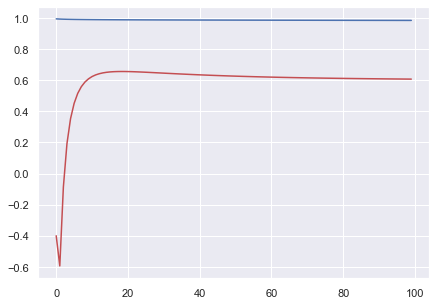

In [272]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [273]:
rid = Ridge(alpha=18.5)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))
rid.coef_

0.9878620968592358
0.6555746643996825


array([  4.95016078, -19.99685188,   3.1967311 ,  -6.83901114,
         0.43129063,   1.93395972,   1.43879374,  -0.70882899,
         8.08024177, -11.25215789,   0.30258262,  19.95646952,
         7.77171652, -21.15049853,   0.53143461,  21.31542194,
         1.29932903,  -2.71251445,  11.0351416 , -10.3045583 ,
         1.33994613,   7.8869427 ,  -3.06844794,  12.50972423,
         1.12523236,  15.91783706,  -0.25595661,  19.49935197,
         7.59699922,  19.68429205,   0.54052345,  -0.53334558,
         6.8335612 ,  -1.92857042,  13.29257536,   5.64847857,
        -1.23193466,   1.10830714,  -6.33988335,   2.05480978,
         0.38247108,  -3.95743635,   1.92929972,  -0.33724606,
        -3.98572146,  -0.69620295,  -8.27461738,  -0.3837603 ,
        19.8703673 ,  -2.92502912,   0.23788417, -12.30040576,
        -0.50467928,  16.34518144,  14.21189024,   0.25972709,
        17.26579176,  -3.12885716,  -0.97441646,  -8.13237758,
         1.59229053,  -2.1500109 ,   5.64061311,   6.41

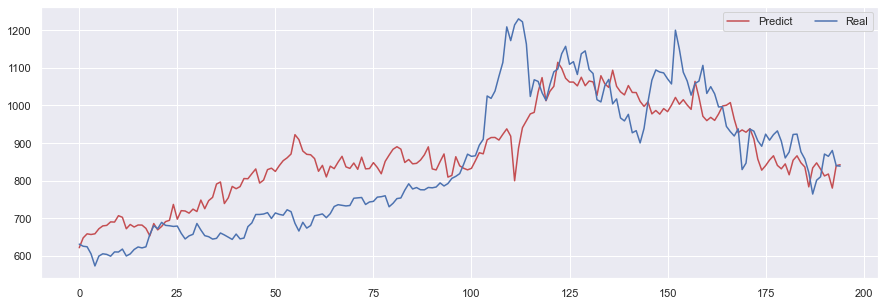

In [277]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

<AxesSubplot:xlabel='0'>

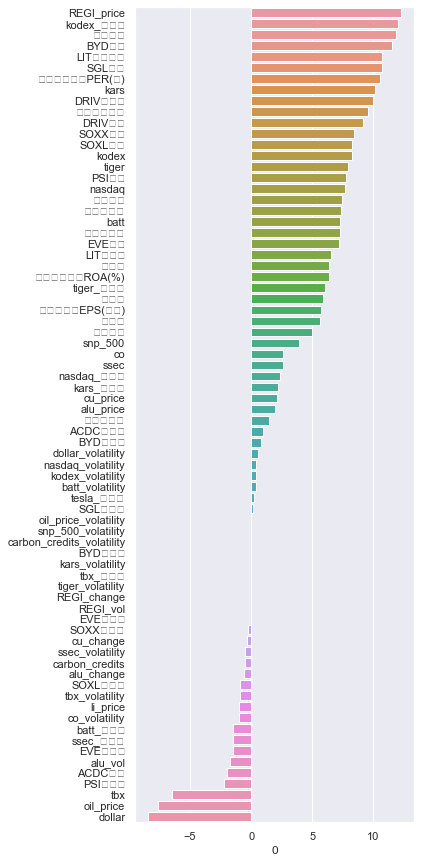

In [278]:
coef_df = pd.DataFrame(ela.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)
sns.set(rc = {'figure.figsize':(5,15)})
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

In [279]:
# las 계수 바꿔보기
for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('las_train :', las.score(x_train_scaled,y_train))
    print('las_test :', las.score(x_test_scaled,y_test))

alpha = 0.0001
las_train : 0.9931365382251918
las_test : -2.163088196470908
alpha = 0.0005
las_train : 0.99313905809084
las_test : -2.145223515836677
alpha = 0.001
las_train : 0.9931422052884212
las_test : -2.123089874200943
alpha = 0.005
las_train : 0.9931664273208864
las_test : -1.9479431710227337
alpha = 0.01
las_train : 0.993190361751096
las_test : -1.7398900737670697
alpha = 0.05
las_train : 0.9932376153395953
las_test : -0.33719000142862887
alpha = 0.1
las_train : 0.9930012210404835
las_test : 0.21229748582579544
alpha = 0.5
las_train : 0.9888623567036413
las_test : 0.6402516371913111
alpha = 1
las_train : 0.9864689105467442
las_test : 0.5738226663334918
alpha = 5
las_train : 0.9827469169126019
las_test : 0.6060998155826978
alpha = 10
las_train : 0.9807890344090413
las_test : 0.5930650696084843
alpha = 50
las_train : 0.9345888950768786
las_test : 0.5524741640664206
alpha = 100
las_train : 0.8168076500189431
las_test : -0.3066227632564722
alpha = 500
las_train : 0.0
las_test : -11

In [280]:
# las 계수 찾기
max_score = -99
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 10, 0.01):
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    test_li.append(las.score(x_test_scaled,y_test))
    train_li.append(las.score(x_train_scaled,y_train))
    if max_score < las.score(x_test_scaled,y_test):
        max_score = las.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = las.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('las_train :', train_score)
print('las_test :', max_score)

alpha = 0.35000000000000003
las_train : 0.989869718699241
las_test : 0.6740719298928222


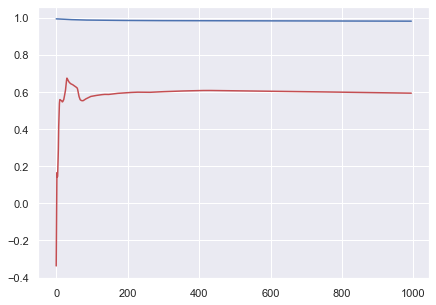

In [281]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [282]:
las = Lasso(alpha=0.35)
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
las.coef_

array([ 4.74295356e+00, -1.05897259e+01,  1.05398468e+00, -2.47006577e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.16876897e+01,  6.79991794e-01,  6.10751509e+01,
        4.79968373e+00, -1.73681118e+01,  1.06512772e+00,  3.16516196e+01,
       -0.00000000e+00, -9.28046579e-01,  2.11686378e+01, -7.51112381e+00,
        0.00000000e+00,  0.00000000e+00, -1.98029307e+00,  0.00000000e+00,
        1.34206578e+00,  7.55300758e+00, -0.00000000e+00,  1.32795015e+01,
        5.28121550e+00,  3.94456866e+00,  2.09116257e-02,  7.99835018e-01,
        0.00000000e+00, -1.23281240e+00,  3.08694946e+00,  0.00000000e+00,
       -1.77460949e+00,  1.29432031e+00, -2.58663102e+00,  4.37454035e+00,
       -0.00000000e+00,  0.00000000e+00,  1.00425841e+00, -3.00441528e+00,
       -3.24435653e+00, -0.00000000e+00, -3.08220010e+01,  0.00000000e+00,
        1.41877141e+00, -2.49335904e+00,  2.01198180e-01, -3.82601233e+01,
        0.00000000e+00,  

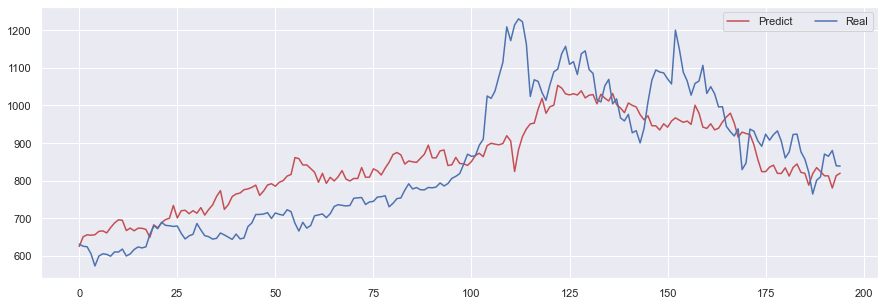

In [283]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_las)),preds_las, c='r', label='Predict')
plt.plot(range(0,len(preds_las)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [284]:
# elastic 계수 바꿔보기
max_score = 0
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 9.44
ratio = 0.5
ela_train : 0.9471666165941464
ela_test : 0.6890886945389401


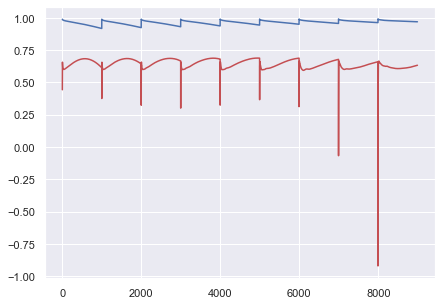

In [285]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [286]:
ela = ElasticNet(l1_ratio=0.5, alpha=9.44)
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))
ela.coef_

ela_train : 0.9471666165941464
ela_test : 0.6890886945389401


array([-0.        , -1.24021114,  0.        ,  2.59623771,  0.        ,
        6.74963418, -1.99723053, -0.        ,  7.3050673 ,  4.46885308,
        0.        ,  6.37865772,  5.59916323,  2.09208   ,  2.82643178,
        6.94406381,  3.79081514,  0.        ,  4.39784615,  2.81993457,
        0.        ,  6.43152252,  0.        ,  6.66280868,  0.        ,
        5.93124522, -0.04531099,  7.08740717,  5.27856978,  7.06811226,
        0.        , -0.        ,  2.25174394,  0.        ,  3.03629504,
        6.73909788,  3.91862957,  0.        ,  5.3289249 ,  0.43922419,
        0.        , -6.48616243, -0.        ,  2.81509965, -1.79928061,
        0.        ,  4.32707213,  0.        ,  7.34465881,  1.23351693,
        0.        ,  5.47443599,  0.        ,  6.37893679,  6.58680442,
        0.11033809,  6.42940073,  5.66796415,  0.        , -5.15368298,
        0.25294912,  0.        ,  4.40386353,  5.54622074,  5.17297026,
        6.24534205,  6.61147563,  6.24156896,  7.31334752,  6.71

<AxesSubplot:xlabel='0'>

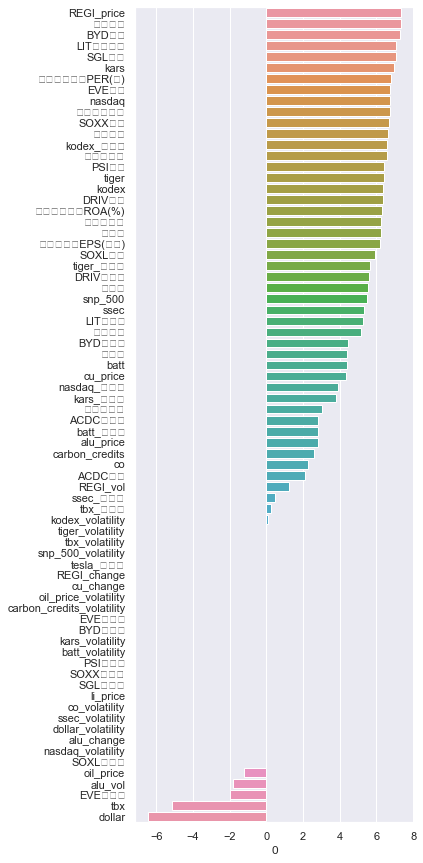

In [287]:
coef_df = pd.DataFrame(ela.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)
sns.set(rc = {'figure.figsize':(5,15)})
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

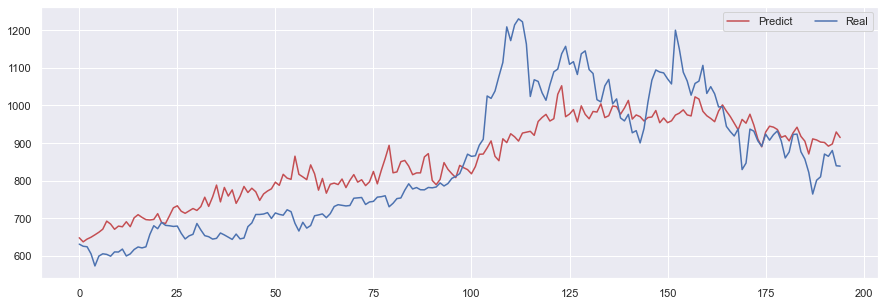

In [288]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_ela)),preds_ela, c='r', label='Predict')
plt.plot(range(0,len(preds_ela)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [289]:
# feature 조정
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)

In [290]:
# NaN값 채우기
df.interpolate(inplace=True)

In [291]:
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)

In [292]:
# 재무제표 드랍
y = df.tesla
x = df.drop(['date','tesla', 'elec_fee', 'tesla_volatility','snp_500', 'snp_500_volatility',
            '매출액', '매출원가', '매출총이익', '영업이익', '순이익', '자산총계', '매출총이익률', '영업이익률',
       '주당순이익EPS(달러)', '주가수익배수PER(배)', '총자산이익률ROA(%)'], axis=1)

In [293]:
# 80 : 20 비율
x_train, x_test = x.iloc[:600], x.iloc[600:]
y_train, y_test = y.iloc[:600], y.iloc[600:]

In [294]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [295]:
# model 돌려보기
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
preds_lr = lr.predict(x_test_scaled)
print('lr_train :', lr.score(x_train_scaled,y_train))
print('lr_test :', lr.score(x_test_scaled,y_test))

rid = Ridge()
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print('='*50)
print('rid_train :', rid.score(x_train_scaled,y_train))
print('rid_test :', rid.score(x_test_scaled,y_test))
las = Lasso()
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
print('='*50)
print('las_train :', las.score(x_train_scaled,y_train))
print('las_test :', las.score(x_test_scaled,y_test))
xb = XGBRegressor()
xb.fit(x_train_scaled, y_train)
preds_xb = xb.predict(x_test_scaled)
print('='*50)
print('xgb_train :', xb.score(x_train_scaled,y_train))
print('xgb_test :', xb.score(x_test_scaled,y_test))
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)
preds_lgbm = lgbm.predict(x_test_scaled)
print('='*50)
print('lgbm_train :', lgbm.score(x_train_scaled,y_train))
print('lgbm_test :', lgbm.score(x_test_scaled,y_test))
ela = ElasticNet()
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

lr_train : 0.9883456426129648
lr_test : 0.06886668075243896
rid_train : 0.9878283318961614
rid_test : 0.41478315583075775
las_train : 0.9849402779754556
las_test : 0.4866420191836899
xgb_train : 0.9999999910992741
xgb_test : -0.6275664544215733
lgbm_train : 0.9997421287978392
lgbm_test : -0.5750975742246558
ela_train : 0.9758727316774767
ela_test : 0.19510390603439687


In [296]:
cat = CatBoost()
cat.fit(x_train_scaled, y_train)
preds_cat = cat.predict(x_test_scaled)
print('='*50)
print('cat_test :', r2_score(y_test,preds_cat))

Learning rate set to 0.037768
0:	learn: 248.8303448	total: 5.01ms	remaining: 5s
1:	learn: 240.9938252	total: 9.48ms	remaining: 4.73s
2:	learn: 233.8710444	total: 13.5ms	remaining: 4.49s
3:	learn: 226.8142408	total: 17.5ms	remaining: 4.36s
4:	learn: 219.5950161	total: 22.5ms	remaining: 4.47s
5:	learn: 212.7418054	total: 26.4ms	remaining: 4.37s
6:	learn: 205.5303360	total: 30.2ms	remaining: 4.29s
7:	learn: 198.7570409	total: 34.4ms	remaining: 4.27s
8:	learn: 192.3878819	total: 38.4ms	remaining: 4.22s
9:	learn: 186.2223020	total: 42.5ms	remaining: 4.21s
10:	learn: 180.5106562	total: 46.4ms	remaining: 4.17s
11:	learn: 174.9332247	total: 50.3ms	remaining: 4.14s
12:	learn: 169.3106910	total: 54.2ms	remaining: 4.12s
13:	learn: 163.8523937	total: 58ms	remaining: 4.08s
14:	learn: 158.9060667	total: 61.8ms	remaining: 4.06s
15:	learn: 153.9242628	total: 65.8ms	remaining: 4.05s
16:	learn: 149.1258779	total: 69.9ms	remaining: 4.04s
17:	learn: 144.6101616	total: 73.9ms	remaining: 4.03s
18:	learn: 14

173:	learn: 15.2186345	total: 703ms	remaining: 3.34s
174:	learn: 15.1408166	total: 707ms	remaining: 3.33s
175:	learn: 15.0660749	total: 712ms	remaining: 3.33s
176:	learn: 14.9765719	total: 716ms	remaining: 3.33s
177:	learn: 14.9050971	total: 720ms	remaining: 3.33s
178:	learn: 14.8526336	total: 725ms	remaining: 3.32s
179:	learn: 14.7992582	total: 729ms	remaining: 3.32s
180:	learn: 14.6939975	total: 733ms	remaining: 3.31s
181:	learn: 14.6589514	total: 737ms	remaining: 3.31s
182:	learn: 14.5904414	total: 741ms	remaining: 3.31s
183:	learn: 14.5340128	total: 744ms	remaining: 3.3s
184:	learn: 14.4473571	total: 748ms	remaining: 3.3s
185:	learn: 14.4165663	total: 752ms	remaining: 3.29s
186:	learn: 14.3557006	total: 756ms	remaining: 3.29s
187:	learn: 14.2856916	total: 760ms	remaining: 3.28s
188:	learn: 14.1806629	total: 764ms	remaining: 3.28s
189:	learn: 14.1003109	total: 767ms	remaining: 3.27s
190:	learn: 14.0686773	total: 771ms	remaining: 3.27s
191:	learn: 14.0287816	total: 775ms	remaining: 3

350:	learn: 7.9569781	total: 1.43s	remaining: 2.65s
351:	learn: 7.9326422	total: 1.44s	remaining: 2.65s
352:	learn: 7.9275757	total: 1.44s	remaining: 2.64s
353:	learn: 7.9225418	total: 1.45s	remaining: 2.64s
354:	learn: 7.8994396	total: 1.45s	remaining: 2.63s
355:	learn: 7.8642483	total: 1.45s	remaining: 2.63s
356:	learn: 7.8313942	total: 1.46s	remaining: 2.63s
357:	learn: 7.8128428	total: 1.46s	remaining: 2.62s
358:	learn: 7.7878908	total: 1.47s	remaining: 2.62s
359:	learn: 7.7687475	total: 1.47s	remaining: 2.61s
360:	learn: 7.7497463	total: 1.47s	remaining: 2.61s
361:	learn: 7.7244385	total: 1.48s	remaining: 2.6s
362:	learn: 7.6812910	total: 1.48s	remaining: 2.6s
363:	learn: 7.6562767	total: 1.49s	remaining: 2.6s
364:	learn: 7.6289240	total: 1.49s	remaining: 2.6s
365:	learn: 7.5972555	total: 1.5s	remaining: 2.59s
366:	learn: 7.5830852	total: 1.5s	remaining: 2.59s
367:	learn: 7.5671204	total: 1.5s	remaining: 2.58s
368:	learn: 7.5578348	total: 1.51s	remaining: 2.58s
369:	learn: 7.52273

510:	learn: 5.1969735	total: 2.16s	remaining: 2.06s
511:	learn: 5.1794777	total: 2.16s	remaining: 2.06s
512:	learn: 5.1735302	total: 2.17s	remaining: 2.06s
513:	learn: 5.1643275	total: 2.17s	remaining: 2.05s
514:	learn: 5.1602064	total: 2.17s	remaining: 2.05s
515:	learn: 5.1412397	total: 2.18s	remaining: 2.04s
516:	learn: 5.1269044	total: 2.18s	remaining: 2.04s
517:	learn: 5.1141901	total: 2.19s	remaining: 2.04s
518:	learn: 5.0955262	total: 2.19s	remaining: 2.03s
519:	learn: 5.0843949	total: 2.2s	remaining: 2.03s
520:	learn: 5.0673434	total: 2.2s	remaining: 2.02s
521:	learn: 5.0544402	total: 2.21s	remaining: 2.02s
522:	learn: 5.0452311	total: 2.21s	remaining: 2.02s
523:	learn: 5.0286007	total: 2.21s	remaining: 2.01s
524:	learn: 5.0255387	total: 2.22s	remaining: 2.01s
525:	learn: 5.0063403	total: 2.22s	remaining: 2s
526:	learn: 4.9893065	total: 2.23s	remaining: 2s
527:	learn: 4.9812316	total: 2.23s	remaining: 1.99s
528:	learn: 4.9599426	total: 2.23s	remaining: 1.99s
529:	learn: 4.949466

680:	learn: 3.4221979	total: 2.88s	remaining: 1.35s
681:	learn: 3.4149483	total: 2.89s	remaining: 1.35s
682:	learn: 3.4062329	total: 2.89s	remaining: 1.34s
683:	learn: 3.3954865	total: 2.9s	remaining: 1.34s
684:	learn: 3.3801336	total: 2.9s	remaining: 1.33s
685:	learn: 3.3673568	total: 2.91s	remaining: 1.33s
686:	learn: 3.3615243	total: 2.91s	remaining: 1.33s
687:	learn: 3.3599444	total: 2.92s	remaining: 1.32s
688:	learn: 3.3491576	total: 2.92s	remaining: 1.32s
689:	learn: 3.3473308	total: 2.93s	remaining: 1.31s
690:	learn: 3.3377888	total: 2.93s	remaining: 1.31s
691:	learn: 3.3279498	total: 2.93s	remaining: 1.31s
692:	learn: 3.3197801	total: 2.94s	remaining: 1.3s
693:	learn: 3.3183737	total: 2.94s	remaining: 1.3s
694:	learn: 3.3097400	total: 2.95s	remaining: 1.29s
695:	learn: 3.3022935	total: 2.95s	remaining: 1.29s
696:	learn: 3.2902978	total: 2.96s	remaining: 1.28s
697:	learn: 3.2889379	total: 2.96s	remaining: 1.28s
698:	learn: 3.2802927	total: 2.96s	remaining: 1.28s
699:	learn: 3.27

848:	learn: 2.2485183	total: 3.61s	remaining: 642ms
849:	learn: 2.2433663	total: 3.61s	remaining: 638ms
850:	learn: 2.2355826	total: 3.62s	remaining: 634ms
851:	learn: 2.2270546	total: 3.62s	remaining: 629ms
852:	learn: 2.2215247	total: 3.63s	remaining: 625ms
853:	learn: 2.2162605	total: 3.63s	remaining: 621ms
854:	learn: 2.2101387	total: 3.64s	remaining: 617ms
855:	learn: 2.2059562	total: 3.64s	remaining: 613ms
856:	learn: 2.1969179	total: 3.65s	remaining: 608ms
857:	learn: 2.1932090	total: 3.65s	remaining: 604ms
858:	learn: 2.1894488	total: 3.65s	remaining: 600ms
859:	learn: 2.1888944	total: 3.66s	remaining: 596ms
860:	learn: 2.1836993	total: 3.66s	remaining: 591ms
861:	learn: 2.1772270	total: 3.67s	remaining: 587ms
862:	learn: 2.1699826	total: 3.67s	remaining: 583ms
863:	learn: 2.1684769	total: 3.68s	remaining: 579ms
864:	learn: 2.1616924	total: 3.68s	remaining: 574ms
865:	learn: 2.1554710	total: 3.69s	remaining: 570ms
866:	learn: 2.1478558	total: 3.69s	remaining: 566ms
867:	learn: 

In [297]:
# rid 계수 바꿔보기
for i in [0.0001,0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('rid_train :', rid.score(x_train_scaled,y_train))
    print('rid_test :', rid.score(x_test_scaled,y_test))

alpha = 0.0001
rid_train : 0.988345642559713
rid_test : 0.06920582558712529
alpha = 0.0005
rid_train : 0.9883456412869752
rid_test : 0.07055679446472551
alpha = 0.001
rid_train : 0.9883456373351989
rid_test : 0.07223299633961366
alpha = 0.005
rid_train : 0.9883455156051374
rid_test : 0.08516348341298885
alpha = 0.01
rid_train : 0.9883451566417788
rid_test : 0.10022178429019368
alpha = 0.05
rid_train : 0.9883364140538646
rid_test : 0.1892921726276685
alpha = 0.1
rid_train : 0.9883167699134586
rid_test : 0.2548682674745725
alpha = 0.5
rid_train : 0.9880907825145256
rid_test : 0.38261155010126413
alpha = 1
rid_train : 0.9878283318961614
rid_test : 0.41478315583075775
alpha = 5
rid_train : 0.9867883685454407
rid_test : 0.4789735996971777
alpha = 10
rid_train : 0.9861958498376213
rid_test : 0.48584685214454637
alpha = 100
rid_train : 0.9818340910281516
rid_test : 0.311183593068183


In [298]:
# rid 계수 확인하기
max_score = -20
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 10, 0.01):
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    test_li.append(rid.score(x_test_scaled,y_test))
    train_li.append(rid.score(x_train_scaled,y_train))
    if max_score < rid.score(x_test_scaled,y_test):
        max_score = rid.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = rid.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('rid_train :', train_score)
print('rid_test :', max_score)

alpha = 8.750000000000002
rid_train : 0.9863202128996943
rid_test : 0.48633054941630305


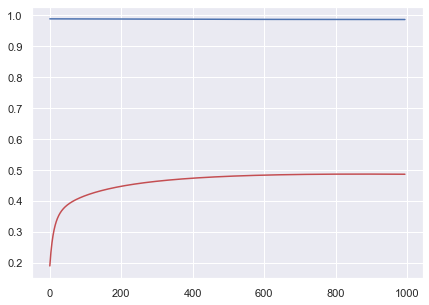

In [299]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [300]:
rid = Ridge(alpha=8.75)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
rid.coef_
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))

0.9863202128996943
0.48633054941630305


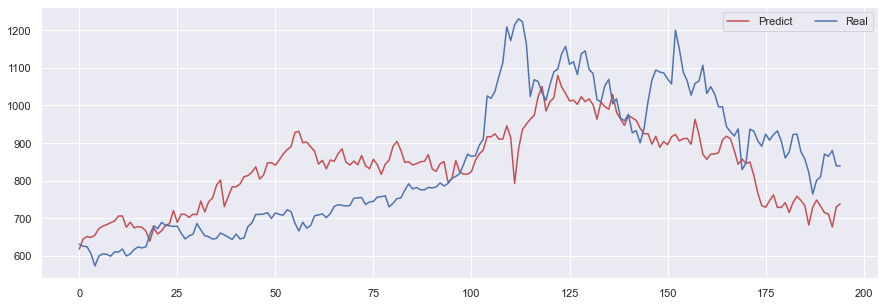

In [301]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [302]:
# las 계수 바꿔보기
for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('las_train :', las.score(x_train_scaled,y_train))
    print('las_test :', las.score(x_test_scaled,y_test))

alpha = 0.0001
las_train : 0.9880560792250003
las_test : 0.1834998128404305
alpha = 0.0005
las_train : 0.9880583322523542
las_test : 0.18638684791746662
alpha = 0.001
las_train : 0.9880611099139198
las_test : 0.1899246090275687
alpha = 0.005
las_train : 0.988081767158997
las_test : 0.21555313345583893
alpha = 0.01
las_train : 0.9881034249631966
las_test : 0.24982949679783595
alpha = 0.05
las_train : 0.9880613510004338
las_test : 0.37950578371345833
alpha = 0.1
las_train : 0.987762160863312
las_test : 0.4417364075232859
alpha = 0.5
las_train : 0.9859752291708443
las_test : 0.5101336906428149
alpha = 1
las_train : 0.9849402779754556
las_test : 0.4866420191836899
alpha = 5
las_train : 0.9784014794295299
las_test : 0.37955588495680903
alpha = 10
las_train : 0.9750675499049379
las_test : 0.3564547772223584
alpha = 50
las_train : 0.9258818655471847
las_test : 0.4072810512483763
alpha = 100
las_train : 0.8067173954388022
las_test : -0.41552099195551784
alpha = 500
las_train : 0.0
las_test : -

In [303]:
# las 계수 찾기
max_score = -99
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 1, 0.01):
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    test_li.append(las.score(x_test_scaled,y_test))
    train_li.append(las.score(x_train_scaled,y_train))
    if max_score < las.score(x_test_scaled,y_test):
        max_score = las.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = las.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('las_train :', train_score)
print('las_test :', max_score)

alpha = 0.31000000000000005
las_train : 0.9865850800655864
las_test : 0.513392224229129


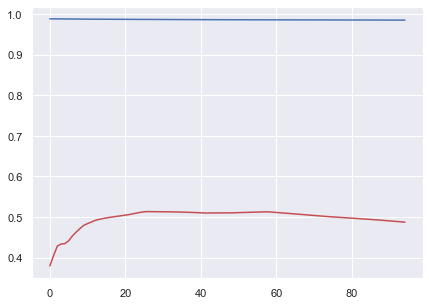

In [304]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [305]:
las = Lasso(alpha=0.31)
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
las.coef_

array([ 2.36849968e+00, -3.29873186e+01,  6.49409935e+00, -6.55383559e+00,
        0.00000000e+00, -1.24670917e+01,  5.84470765e-01, -3.61877706e-01,
        0.00000000e+00, -1.08329395e+01, -0.00000000e+00,  0.00000000e+00,
        3.88646004e+00, -3.35866480e+01,  2.23942014e+00,  9.12265305e+01,
        6.52347501e-02, -1.17417337e+00, -0.00000000e+00, -8.06747146e+00,
        0.00000000e+00, -0.00000000e+00, -1.81585406e+00,  0.00000000e+00,
        5.90044229e-01, -0.00000000e+00,  0.00000000e+00,  8.84961864e+01,
        4.92808361e+00,  1.39811747e+01, -0.00000000e+00,  0.00000000e+00,
        1.28320344e+01, -1.91835639e+00,  2.40800378e+01,  0.00000000e+00,
       -1.28258441e+00,  0.00000000e+00, -0.00000000e+00, -2.46959807e+00,
       -0.00000000e+00, -8.75312819e+00,  2.89892433e+00,  0.00000000e+00,
       -9.80925545e+00, -3.65592528e-01,  0.00000000e+00, -1.32660268e+00,
        2.73857387e+01, -1.15123167e+00, -1.49303150e-02,  0.00000000e+00,
        7.29985705e+00, -

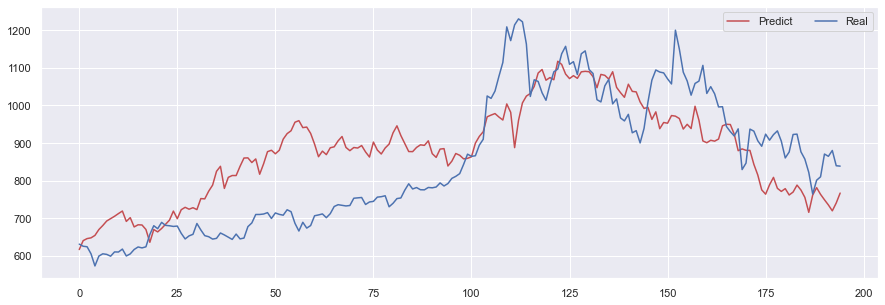

In [306]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_las)),preds_las, c='r', label='Predict')
plt.plot(range(0,len(preds_las)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [307]:
# elastic 계수 바꿔보기
max_score = 0
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 0.05
ratio = 0.8
ela_train : 0.9865732574937612
ela_test : 0.5270784317717834


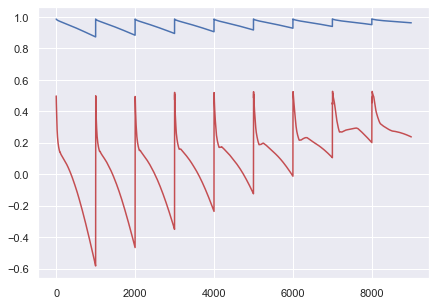

In [308]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [309]:
ela = ElasticNet(l1_ratio=0.8, alpha=0.05)
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

ela_train : 0.9865732574937612
ela_test : 0.5270784317717834


In [310]:
ela.coef_

array([  3.27696012, -29.36131208,   5.92456033, -10.07266328,
         0.25798468, -14.33366867,   1.41156072,  -0.62141205,
        14.11620952, -12.30862397,   0.16734879,  28.3660336 ,
         4.92723801, -31.01285018,   1.78119678,  40.80065596,
         1.58422952,  -1.85382402,  -3.12407907, -10.17991124,
         2.56951974,   4.58258343,  -2.85662034,  25.38317705,
         0.48533205,  -6.86129594,   0.46602527,  41.1187995 ,
         7.30090653,  37.28844011,  -0.34795502,  -0.        ,
        11.55212666,  -2.41775274,  20.69729454,   3.79121876,
        -1.26638246,  -0.11658116,  -1.56997563,  -1.11666208,
         0.11489491, -12.30571017,   3.21685051,   0.20923727,
        -9.95611955,  -0.34525135,   0.        ,  -1.38282255,
        27.44859625,  -2.28540431,  -0.41242069,  18.94388147,
        11.38254663,   0.        ,  25.18086964,  -4.69900437,
        -1.05377199, -19.6885694 ,   1.65008029,  -1.94421618,
         5.30020395])

<AxesSubplot:xlabel='0'>

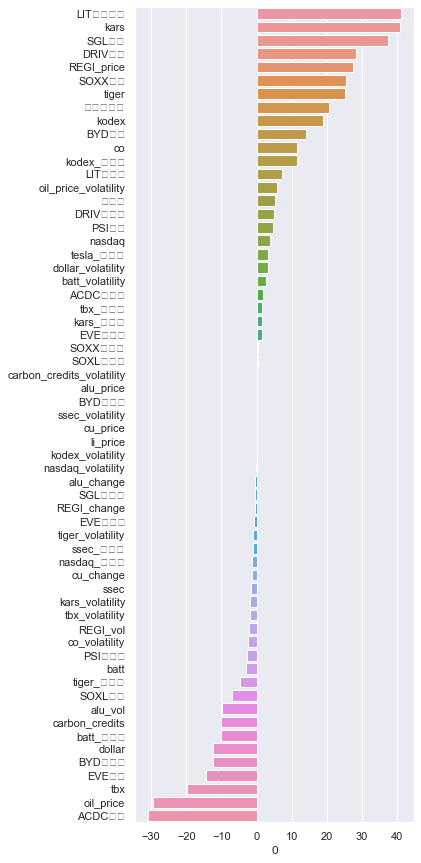

In [311]:
coef_df = pd.DataFrame(ela.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)
sns.set(rc = {'figure.figsize':(5,15)})
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

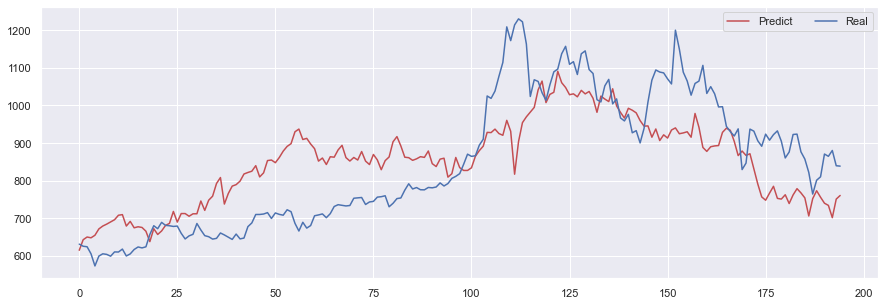

In [312]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_ela)),preds_ela, c='r', label='Predict')
plt.plot(range(0,len(preds_ela)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [333]:
from itertools import combinations

In [334]:
# 10개의 무작위 column 조합
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
# NaN값 채우기
df.interpolate(inplace=True)
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)

In [335]:
cols = df.columns.to_list()
cols = cols[5:]

In [338]:
max_score = -99
max_alpha = 0
train_score = 0
max_col = []
for combi in combinations(cols, 2):
    col = list(combi)
    y = df.tesla
    x = df[col]
    # 80 : 20 비율
    x_train, x_test = x.iloc[:600], x.iloc[600:]
    y_train, y_test = y.iloc[:600], y.iloc[600:]
    scaled = StandardScaler()
    scaled.fit(x_train)
    x_train_scaled = scaled.transform(x_train)
    x_test_scaled = scaled.transform(x_test)
    for i in np.arange(1, 100, 0.5):
        rid = Ridge(alpha=i)
        rid.fit(x_train_scaled, y_train)
        preds_rid = rid.predict(x_test_scaled)
        if max_score < rid.score(x_test_scaled,y_test):
            max_score = rid.score(x_test_scaled,y_test)
            max_alpha = i
            max_col = col
            train_score = rid.score(x_train_scaled,y_train)

In [343]:
print(max_col)
print(max_alpha)
print(max_score)
print(train_score)

['batt', '매출총이익률']
99
0.7021025719525574
0.8379877339788526


In [355]:
y = df.tesla
x = df[['batt', '매출총이익률']]
x_train, x_test = x.iloc[:600], x.iloc[600:]
y_train, y_test = y.iloc[:600], y.iloc[600:]
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)
rid = Ridge(alpha=110)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
rid.coef_
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))

0.8360385803198459
0.7133299544872651


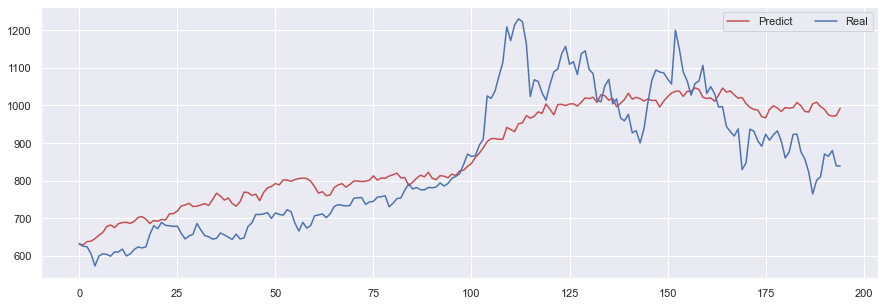

In [357]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()